In [1]:
from utils import *
from tqdm.auto import tqdm
from SALib.analyze import pawn, morris
from scipy.signal import correlate
import numpy as np
import pickle
import time
import os
import scipy.interpolate as spi
from scipy.stats import binned_statistic_2d

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.patches as patches
from matplotlib.colors import Normalize
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": False, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
plt.rc("text", usetex=False)
plt.rc("font", family="serif")

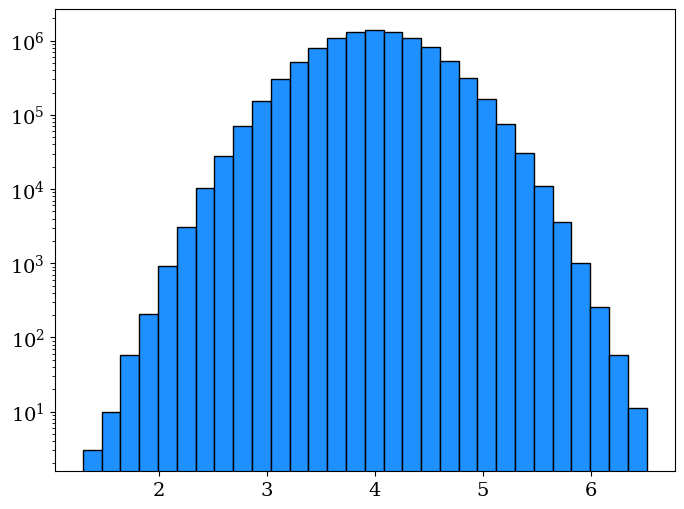

In [62]:
shocks = np.random.normal(4, 0.5, 10000*1000)
plt.hist(shocks, bins=30, color="dodgerblue", edgecolor="k")
plt.yscale("log")

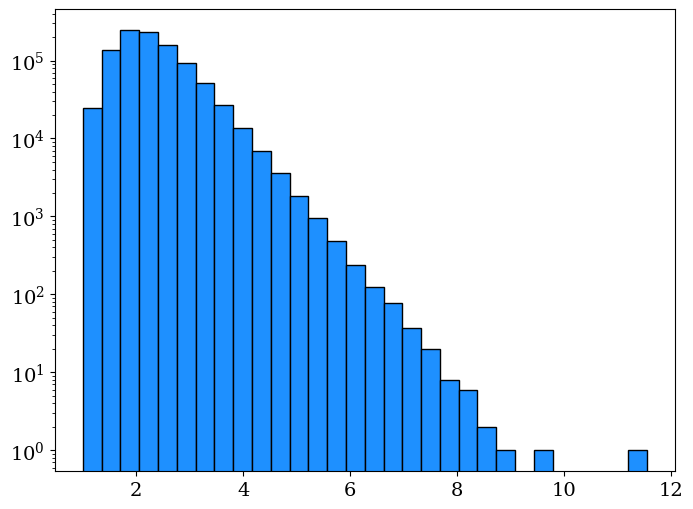

In [67]:
shocks = genextreme.rvs(-0.01, loc=2, scale=0.5, size=1000000)
shocks = np.clip(shocks, 1, None)
plt.hist(shocks, bins=30, color="dodgerblue", edgecolor="k")
plt.yscale("log")

In [69]:
result_suffix = "shocks_4"
result_dir = "results_" + result_suffix

In [70]:
idx_list = [
    3, 106, 431, 130, 2, 197, 512, 387, 757, 417, 314, 880, 15, 533, 567, 253, 896, 54
]


interpolation_functions = {}
for f in tqdm(sorted(os.listdir(result_dir))):
    with open(os.path.join(result_dir, f), "rb") as fl:
        res = pickle.load(fl)
    idx = int(f.split(".")[0])
    wealth = res["wealth"]
    health = res["health"]
    interp_func = get_interpolation_function(
        res["wealth"][:,-1],
        res["health"][:,-1]
    )
    interpolation_functions[idx_list[idx]] = (res["params"], interp_func)

with open(f"interpolation_functions_{result_suffix}.pickle", "wb") as f:
    pickle.dump(interpolation_functions, f)

  0%|          | 0/18 [00:00<?, ?it/s]

/var/folders/mz/n_rzzjx149d19ncnxglpf7n40000gn/T/ipykernel_10327/1562053586.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  asdf[w][h] = func(w,h)
/var/folders/mz/n_rzzjx149d19ncnxglpf7n40000gn/T/ipykernel_10327/1562053586.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  asdf[w][h] = func(w,h)
/var/folders/mz/n_rzzjx149d19ncnxglpf7n40000gn/T/ipykernel_10327/1562053586.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  asdf[w][h] = func(w,h)
/var/folders/

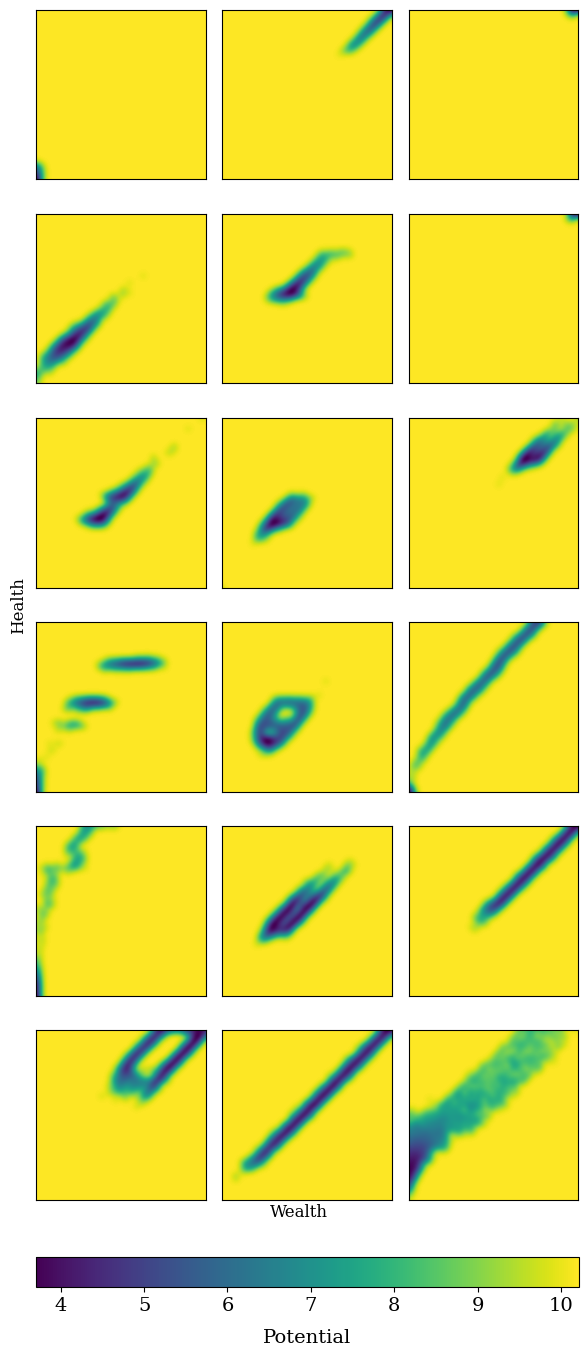

In [71]:
fig, axs = plt.subplots(6, 3, figsize=(7,15))

# 1 minimum
indices = [3, 106, 431]
for i,idx in enumerate(indices):
    func = interpolation_functions[idx][1]
    asdf = np.zeros((200,200))
    for w in range(200):
        for h in range(200):
            asdf[w][h] = func(w,h)
    im = axs[0][i].imshow(asdf.T, origin="lower")
    axs[0][i].set_xlim(0,200)
    axs[0][i].set_ylim(0,200)
    axs[0][i].set_xticks([])
    axs[0][i].set_yticks([])

# 2 minima
indices = [130, 2, 197]
for i,idx in enumerate(indices):
    func = interpolation_functions[idx][1]
    asdf = np.zeros((200,200))
    for w in range(200):
        for h in range(200):
            asdf[w][h] = func(w,h)
    axs[1][i].imshow(asdf.T, origin="lower")
    axs[1][i].set_xlim(0,200)
    axs[1][i].set_ylim(0,200)
    axs[1][i].set_xticks([])
    axs[1][i].set_yticks([])

# 3 minima
indices = [512, 387, 757]
for i,idx in enumerate(indices):
    func = interpolation_functions[idx][1]
    asdf = np.zeros((200,200))
    for w in range(200):
        for h in range(200):
            asdf[w][h] = func(w,h)
    axs[2][i].imshow(asdf.T, origin="lower")
    axs[2][i].set_xlim(0,200)
    axs[2][i].set_ylim(0,200)
    axs[2][i].set_xticks([])
    axs[2][i].set_yticks([])

# 4 minima
indices = [417, 314, 880]
for i,idx in enumerate(indices):
    func = interpolation_functions[idx][1]
    asdf = np.zeros((200,200))
    for w in range(200):
        for h in range(200):
            asdf[w][h] = func(w,h)
    axs[3][i].imshow(asdf.T, origin="lower")
    axs[3][i].set_xlim(0,200)
    axs[3][i].set_ylim(0,200)
    axs[3][i].set_xticks([])
    axs[3][i].set_yticks([])

# 5 minima
indices = [15, 533, 567]
for i,idx in enumerate(indices):
    func = interpolation_functions[idx][1]
    asdf = np.zeros((200,200))
    for w in range(200):
        for h in range(200):
            asdf[w][h] = func(w,h)
    axs[4][i].imshow(asdf.T, origin="lower")
    axs[4][i].set_xlim(0,200)
    axs[4][i].set_ylim(0,200)
    axs[4][i].set_xticks([])
    axs[4][i].set_yticks([])

# 6, 7 minima
indices = [253, 896, 54]
for i,idx in enumerate(indices):
    func = interpolation_functions[idx][1]
    asdf = np.zeros((200,200))
    for w in range(200):
        for h in range(200):
            asdf[w][h] = func(w,h)
    axs[5][i].imshow(asdf.T, origin="lower")
    axs[5][i].set_xlim(0,200)
    axs[5][i].set_ylim(0,200)
    axs[5][i].set_xticks([])
    axs[5][i].set_yticks([])

fig.subplots_adjust(hspace=0.05, wspace=0.1, top=0.92)
cbar_ax = fig.add_axes([0.125, 0.06, 0.775, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Potential', labelpad=10, fontsize=14, loc='center')

fig.text(0.5, 0.11, 'Wealth', ha='center', va='center', fontsize=12)
fig.text(0.1, 0.515, 'Health', ha='center', va='center', rotation='vertical', fontsize=12)

plt.savefig(f"minima_zoo_{result_suffix}.pdf", bbox_inches="tight")
plt.show()